# Flipkart Customer Support - Exploratory Data Analysis (EDA)

## 1. Introduction

This notebook performs exploratory data analysis (EDA) on Flipkart's customer support data to uncover insights about communication channels, customer categories, agent performance, and customer satisfaction (CSAT) scores.

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Load the data
df = pd.read_csv("Customer_support_data.csv")
df.shape


FileNotFoundError: [Errno 2] No such file or directory: 'Customer_support_data.csv'

In [2]:
import sys
!{sys.executable} -m pip install missingno


## 2. Data Preview and Structure

In [ ]:
df.head()

## 3. Missing Values

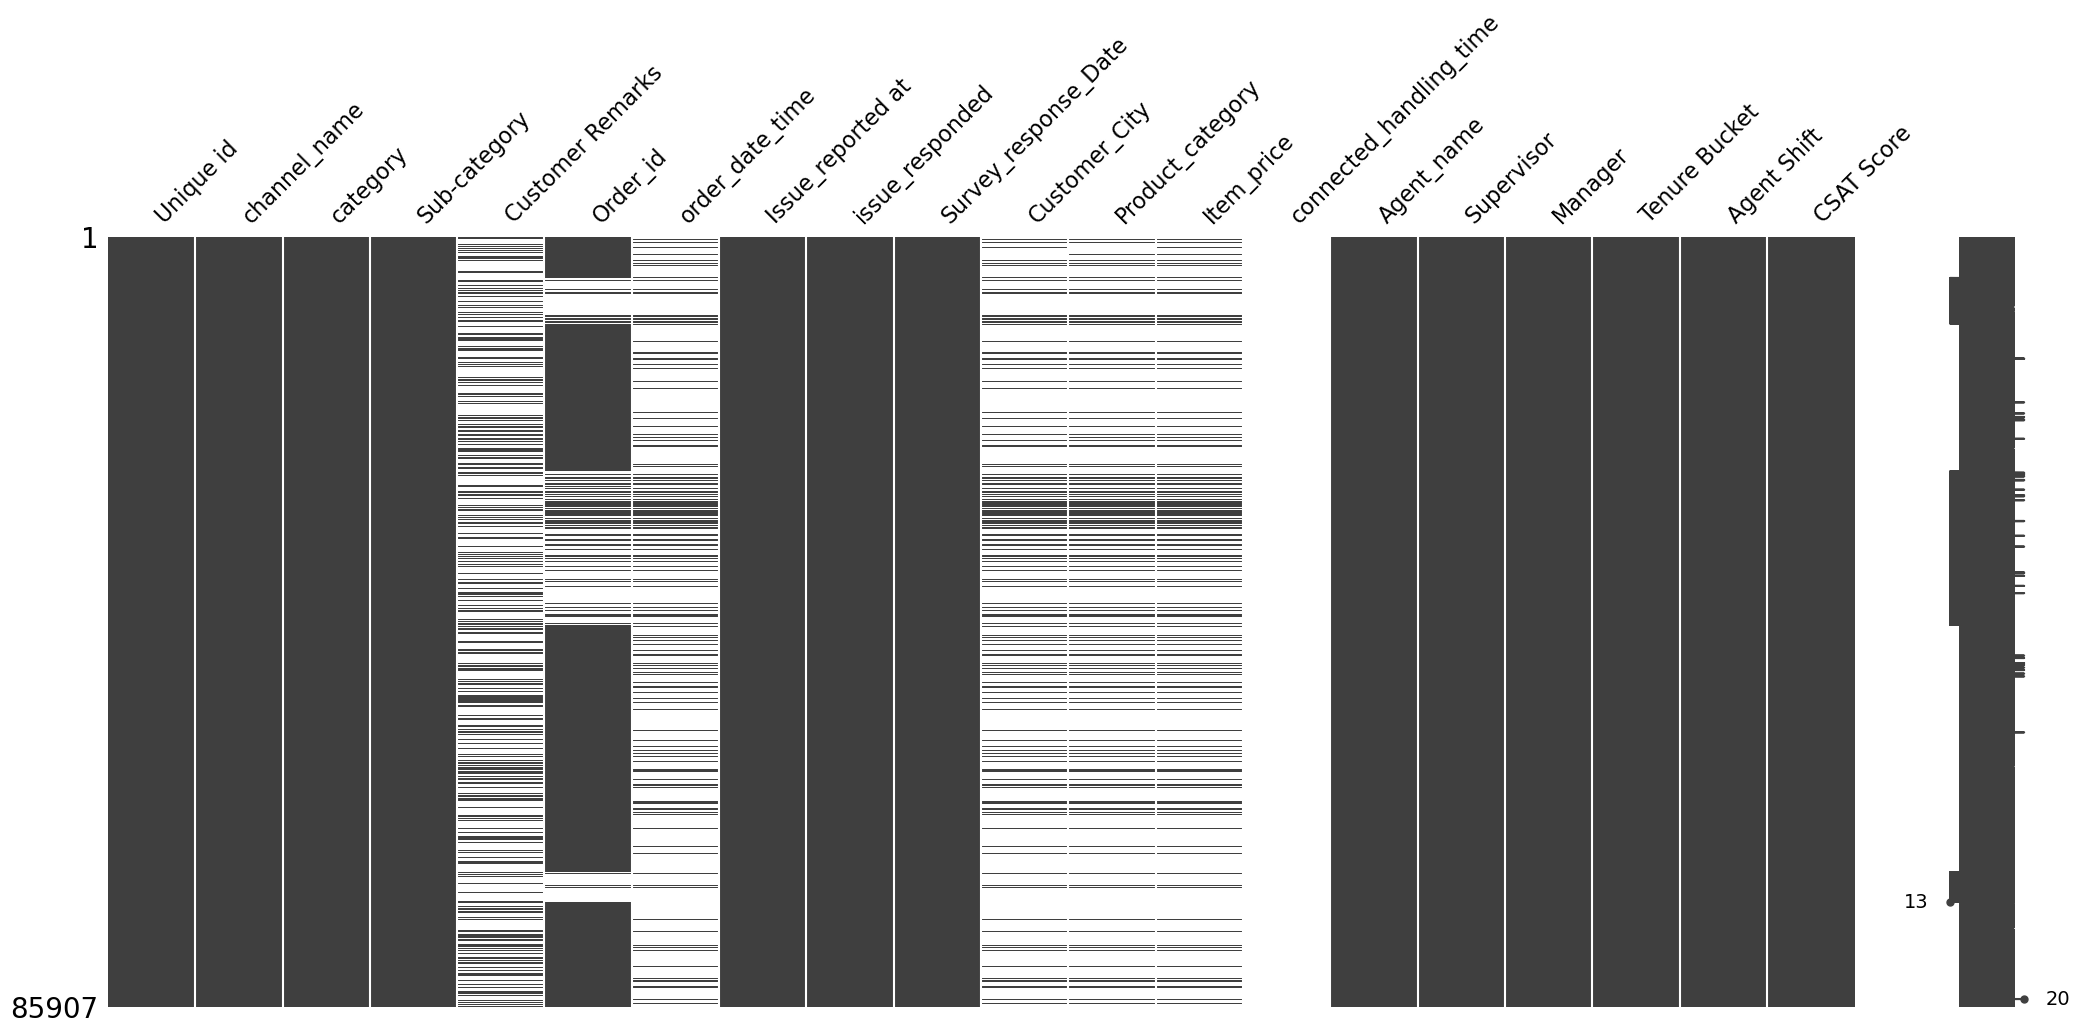

connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Agent Shift                    0
Tenure Bucket                  0
Manager                        0
Supervisor                     0
Agent_name                     0
Unique id                      0
channel_name                   0
Survey_response_Date           0
issue_responded                0
Issue_reported at              0
Sub-category                   0
category                       0
CSAT Score                     0
dtype: int64

In [4]:

# Visualize missing data
msno.matrix(df)
plt.show()

df.isnull().sum().sort_values(ascending=False)


## 4. Categorical Value Counts

In [5]:

categorical_cols = ['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False).head())



Value counts for channel_name:
channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

Value counts for category:
category
Returns              44097
Order Related        23215
Refund Related        4550
Product Queries       3692
Shopzilla Related     2792
Name: count, dtype: int64

Value counts for Sub-category:
Sub-category
Reverse Pickup Enquiry    22389
Return request             8523
Delayed                    7388
Order status enquiry       6922
Installation/demo          4116
Name: count, dtype: int64

Value counts for Agent_name:
Agent_name
Wendy Taylor    429
Timothy Huff    265
David Smith     264
Jamie Smith     253
Kayla Wilson    216
Name: count, dtype: int64

Value counts for Supervisor:
Supervisor
Carter Park         4273
Elijah Yamaguchi    3855
Zoe Yamamoto        3551
Nathan Patel        3549
Noah Patel          3434
Name: count, dtype: int64

Value counts for Manager:
Manager
John Smith         25261
Michael Lee        17600
Jenni

## 5. CSAT Score Distribution

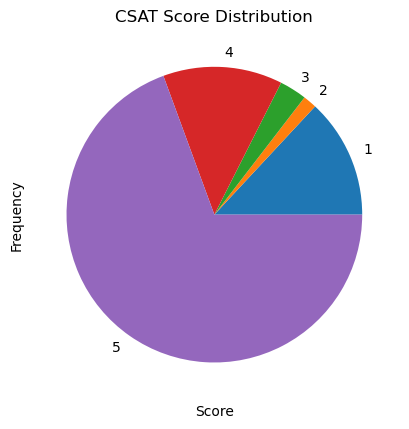

In [9]:

df['CSAT Score'].value_counts().sort_index().plot(kind='pie', color='skyblue')
plt.title("CSAT Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


## 6. Issue Reporting Time

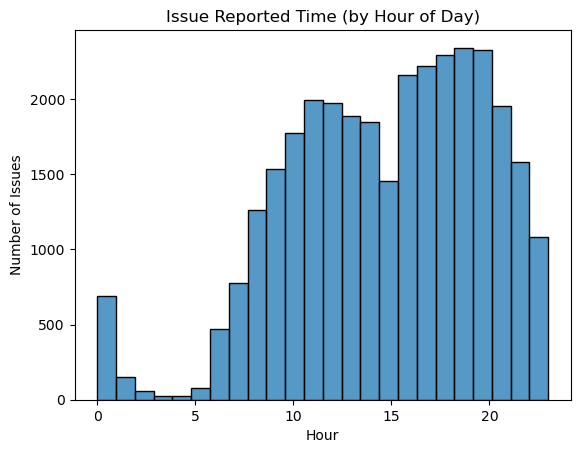

In [10]:

# Convert to datetime
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_hour'] = df['Issue_reported at'].dt.hour

sns.histplot(df['issue_hour'].dropna(), bins=24, kde=False)
plt.title("Issue Reported Time (by Hour of Day)")
plt.xlabel("Hour")
plt.ylabel("Number of Issues")
plt.show()


## 7. Agent and Manager Performance

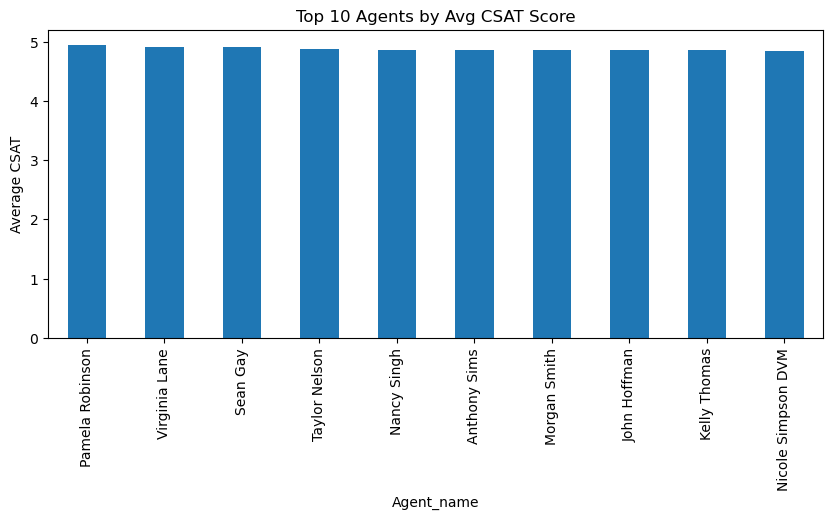

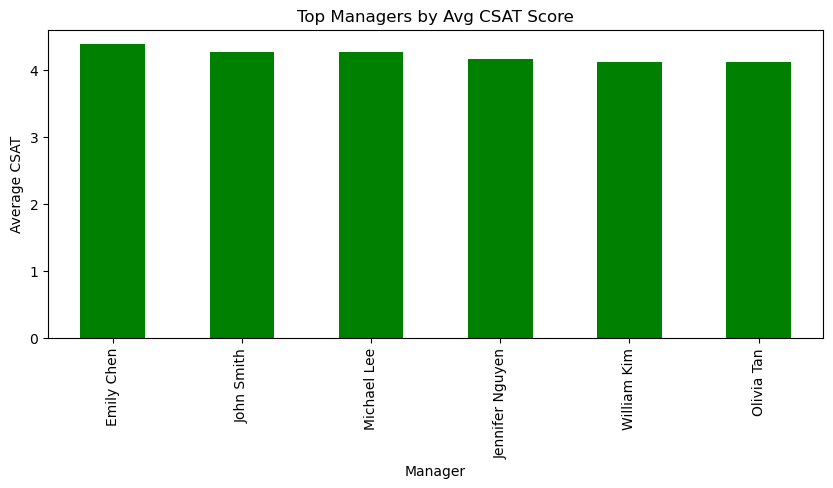

In [11]:

# Average CSAT per Agent
agent_csat = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(10)
agent_csat.plot(kind='bar', title='Top 10 Agents by Avg CSAT Score', figsize=(10,4))
plt.ylabel("Average CSAT")
plt.show()

# Average CSAT per Manager
mgr_csat = df.groupby('Manager')['CSAT Score'].mean().sort_values(ascending=False).head(10)
mgr_csat.plot(kind='bar', color='green', title='Top Managers by Avg CSAT Score', figsize=(10,4))
plt.ylabel("Average CSAT")
plt.show()


## 8. Summary & Insights

- Most common support categories and sub-categories were explored.
- CSAT scores show a skew toward higher ratings (e.g., 5).
- Time-based analysis reveals peak hours for customer queries.
- Certain agents and managers consistently receive higher CSAT ratings.

Further modeling or targeted training may be beneficial to support lower-performing areas.